## Loading the Data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns



In [46]:

ufo_df = pd.read_csv('UFO_data.csv')
ufo_df.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
#Printung the size of the data
ufo_df.shape

(15, 6)

In [47]:
ufo_df.dtypes


Number             float64
City                object
Colors Reported     object
Shape Reported      object
State               object
Time                object
dtype: object

### Checking for null values Column wise

In [48]:
ufo_df.isnull().any()

Number              True
City               False
Colors Reported     True
Shape Reported      True
State               True
Time               False
dtype: bool

### Printing the total number of null Values in Dataset

In [49]:
print('Total Missing values in the Data :- ',ufo_df.isnull().sum().sum())

Total Missing values in the Data :-  15


## Missing Value Treatment

   ### 1)Dropping Null/Missing Values

In [50]:
#Shape of the Data before Dropping missing values
ufo_df.shape

(15, 6)

In [51]:
# Droping the missing or null values
data1 = ufo_df.dropna()

In [52]:
data1.shape

(3, 6)

In [53]:
print('Loss of the Data : ',round((ufo_df.shape[0]-data1.shape[0])*100/ufo_df.shape[0],2),'%')

Loss of the Data :  80.0 %


We are `losing nearly 80 % data by dropping the missing` value rows which would be a loss for the prediction

`Not a good technique for the Data Analytics`

### 2) Filling Missing Values

`Filling Missing Values function is used to replace the null values with a test statistic like mean, median or mode of the particular feature `

We can also specify a `forward-fill` or `back-fill` to propagate `the next values backward` or `previous value forward`.

In [54]:
data_new = ufo_df

In [55]:
data_new.isnull().any()

Number              True
City               False
Colors Reported     True
Shape Reported      True
State               True
Time               False
dtype: bool

Using `Back-fill` or `forward-fill` to propagate next or previous values respectively:

In [57]:
## Before applying fill function on the data.
ufo_df.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [59]:
## After backward-fill
data_new = data_new.fillna(method='bfill')
#for forward-fill
#train.fillna(method=''ffill)
data_new.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,green,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,OVAL,NJ,6/30/1930 20:00
2,87654.0,Holyoke,blue,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,yellow,LIGHT,NY,4/18/1933 19:00


In [60]:
# After forward-fill
data_new = data_new.fillna(method='ffill')
data_new.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,green,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,OVAL,NJ,6/30/1930 20:00
2,87654.0,Holyoke,blue,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,yellow,LIGHT,NY,4/18/1933 19:00


#### What Happens if for a missing value the Next value or previous value is also a Nan

If a previous or next value isn’t available or rather if it is also a NaN value, then, the NaN remains even after back-filling or forward-filling.

In [61]:
data_new.isnull().any()

Number             False
City               False
Colors Reported    False
Shape Reported     False
State              False
Time               False
dtype: bool

Here one columns are still having Missing values

### Filling the missing value with a statistic

In [62]:
data_new = ufo_df

In [63]:
# 'Number' is a column name for our data
mean_value = data_new['Number'].mean()
print("Mean Value", mean_value)
#this will replace all NaN values with the mean of the non null values
data_new['Number']=data_new['Number'].fillna(mean_value)
data_new.head()

Mean Value 33004.666666666664


,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [65]:
data_new.isnull().any()

Number             False
City               False
Colors Reported     True
Shape Reported      True
State               True
Time               False
dtype: bool

In [66]:
data_new = ufo_df


In [67]:
#tip is a column name for our data
median_value = data_new['Number'].median
print("median Value: ",mean_value )
#this will replace all NaN values with the mean of the non null values
data_new['Number'] = data_new['Number'].fillna(median_value)

median Value:  33004.666666666664


Similarly the missing values can be filled by using the `median method`

In [68]:
data_new.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [69]:
#Filling the categorical variables with mode method of imputation
mode_value = data_new['Colors Reported'].mode()
data_new['sex'] = data_new['Colors Reported'].fillna(mode_value[0])

mode_value = data_new['Shape Reported'].mode()
data_new['smoker'] = data_new['Shape Reported'].fillna(mode_value[0])


data_new.head()

,Number,City,Colors Reported,Shape Reported,State,Time,sex,smoker
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,green,TRIANGLE
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00,green,DISK
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,green,OVAL
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00,blue,DISK
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,green,LIGHT


In [70]:
data_new.isnull().any()

Number             False
City               False
Colors Reported     True
Shape Reported      True
State               True
Time               False
sex                False
smoker             False
dtype: bool

### Observations

By mean value imputation for numerical data type and mode value imputation for categorical data ,we are able to  completely fill the null values,but is it a effective method.

Let's find out with a example

Let x be list of age of people who are attending a Gym in a Office

Data without Outlier's

x = [20,25,25,26,28,29,30,35,38,40,45,30]

mean(x) = 31

Data with missing values and a single Outlier

x = [20,_ ,26,_ ,28,29,30,_ ,35,38,_ ,40,100]

mean(x) = 38

We can observe how much the mean value is deviated due to single outlier.So mean is ineffective in presence of outlier's

#### So ,If outlier's are present in the data then median is the best out of box method

### Which method would be most suitable for Imputing the missing values in Class Lables

Mode method of imputation would work but by that we may introduce bias into the model to avoid this ,we generally move those datapoints into test set and try to predict with model

## Outlier Treatment

### Outlier Detection

In [71]:

import pandas as pd
import numpy as np

data = pd.read_csv('tips data.csv',index_col = 0)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [73]:
#Seprating the continues variables
import matplotlib.pyplot as plt
import seaborn as sns

data2 = data.select_dtypes(exclude = 'object')
data2.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


#### Detection Using Box Plot



Feature :-  total_bill


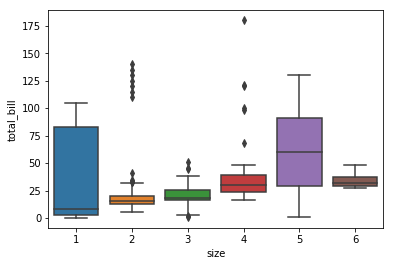



Feature :-  tip


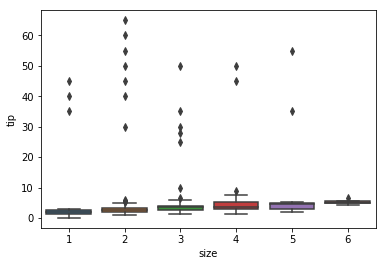



Feature :-  size


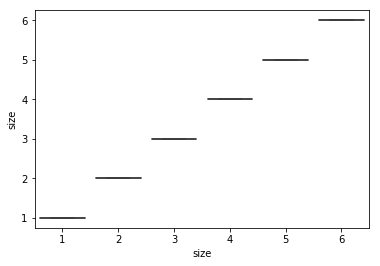

In [74]:
for i in data2.columns:
    print('\n')
    print('Feature :- ',i)
    sns.boxplot(x = 'size',y = i,data = data2)
    plt.show()

The dots in the box plots of the total bill and tips represent the distribution of the outliers class wise in the data.

The presence of the outlier can severely affect the model performance and may lead to improper conclusions.
For example you want to caluculate the total turn over of your restaurent for the next month financial planning.If you caluculate based on outlier data you entire planning may collapse.

#### Detection using Scatter Plot

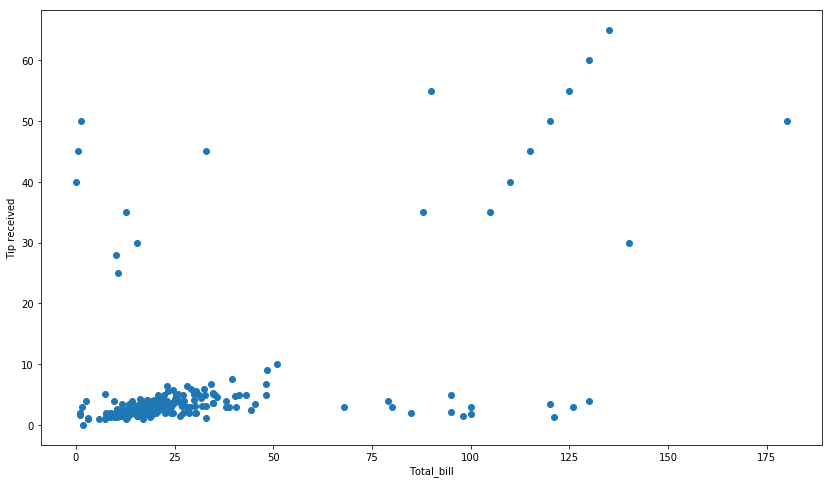

In [75]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(data2['total_bill'], data2['tip'])
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tip received')
plt.show()

#### Detection using Distribution plots

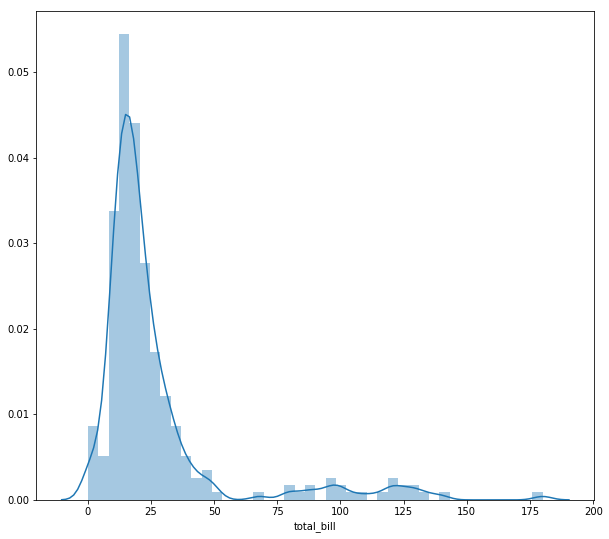

In [76]:
f, ax = plt.subplots(figsize =(10, 9)) 
sns.distplot(data2['total_bill'])
plt.show()


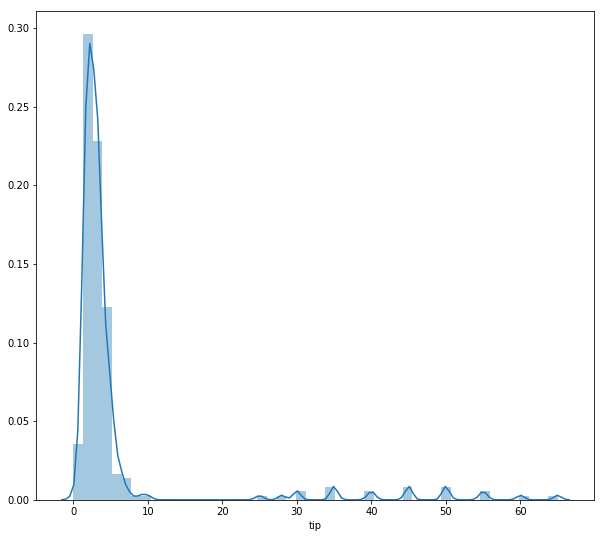

In [77]:
f, ax = plt.subplots(figsize =(10, 9)) 
sns.distplot(data2['tip'])
plt.show()

Both the graphs are right skewed due to the presence of outliers.

### Outlier Correction

#### 1) Dropping Outlier Points

As discussed above if we drop the outlier points we may face a huge loss of Data.

#### 2)Rounding the Outliers

Here we round off all the outlier value with the nearest best percentile value

In [78]:
# Winsorize will round off the outlier values to the percentile of the variable that we mention in the limits
from scipy.stats.mstats import winsorize

for column in data2.columns:
    data2[column] = winsorize(data2[column], limits=(0, 0.2), inclusive=(True, True), inplace=False, axis=None) 

#### Distribution after Outlier Removal

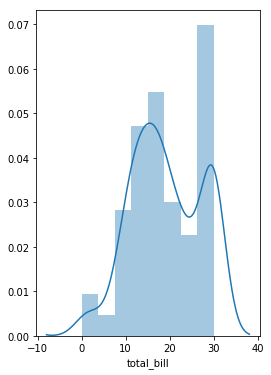

In [79]:
import warnings
warnings.filterwarnings('ignore')
f, ax = plt.subplots(figsize =(4, 6)) 
sns.distplot(data2['total_bill'])
plt.show()

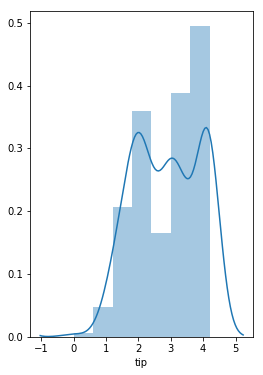

In [80]:
f, ax = plt.subplots(figsize =(4, 6)) 
sns.distplot(data2['tip'])
plt.show()

1)The Skewness in the distribution doesn't exist anymore as the outliers has been rounded off.

2)You can observe the 90% percentile(Highest bar in the last) going high than before as all outliers are rounded to it.